In [50]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt

In [38]:
sale = pd.read_csv('Weekly sales for a novelty item p3738 Montgomery.csv')
sale["x"] = sale["x"].fillna(sale["x"].mean())
sale.head()




,Unnamed: 0,x
0,1,35
1,2,46
2,3,51
3,4,46
4,5,48


In [39]:
sale.describe()



,Unnamed: 0,x
count,65.00000,65.000000
mean,33.00000,63.846154
std,18.90767,13.891579
min,1.00000,35.000000
25%,17.00000,51.000000
50%,33.00000,64.000000
75%,49.00000,76.000000
max,65.00000,94.000000


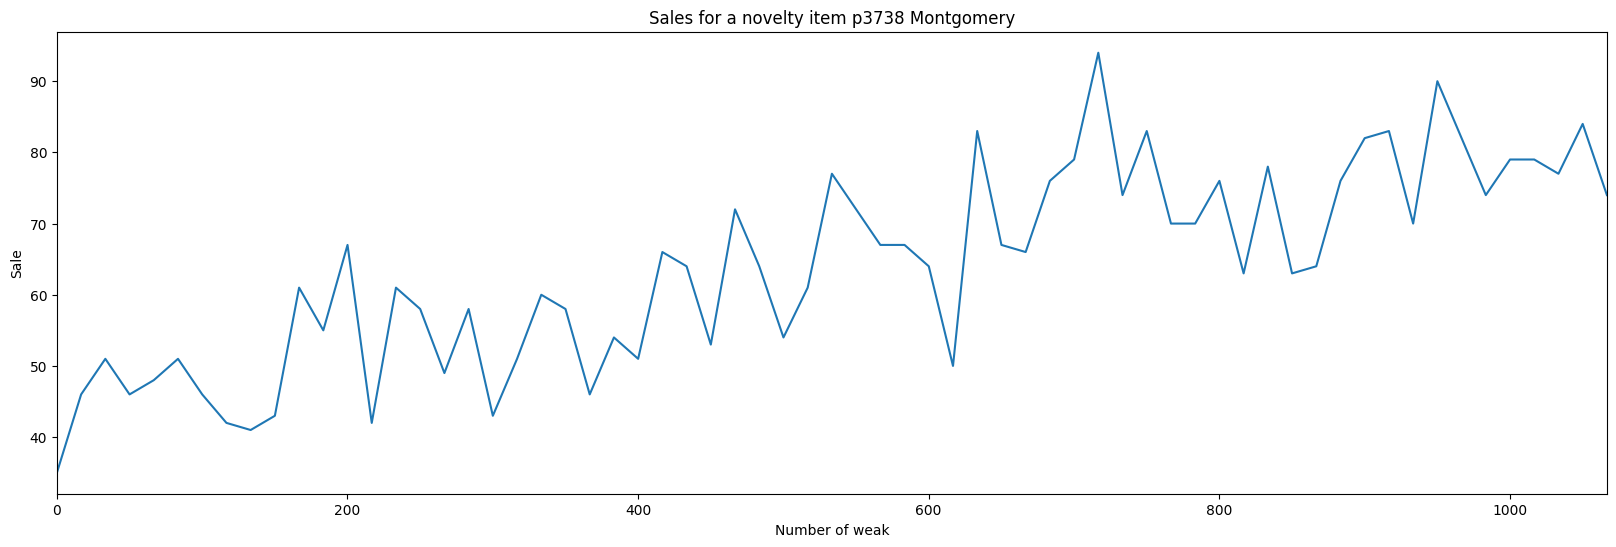

In [40]:
time_axis = np.linspace(0, 1067, len(sale["x"]))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, sale["x"].fillna(sale["x"].mean()))
plt.title('Sales for a novelty item p3738 Montgomery')
plt.xlabel('Number of weak')
plt.ylabel('Sale')
plt.xlim(0, 1067)
plt.show()

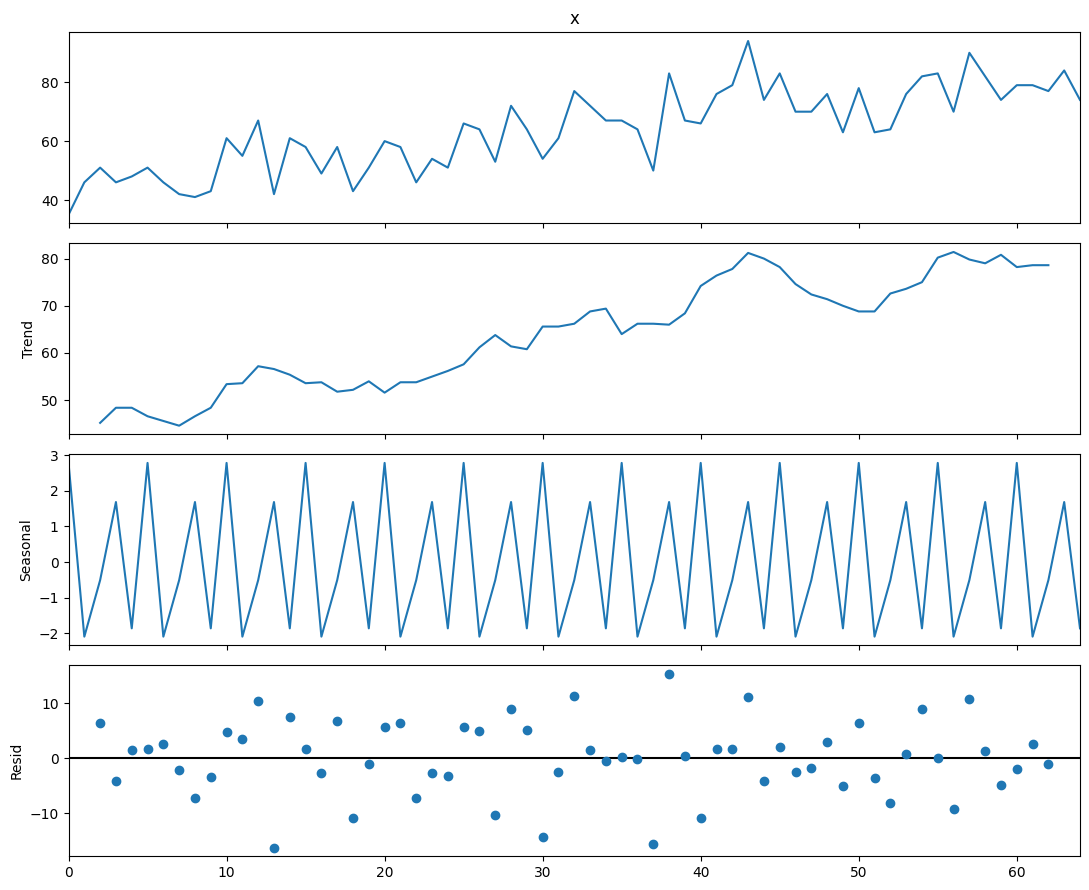

In [41]:
rcParams['figure.figsize'] = 11, 9
decompose = seasonal_decompose(sale["x"], period=5)
decompose.plot()
plt.show()

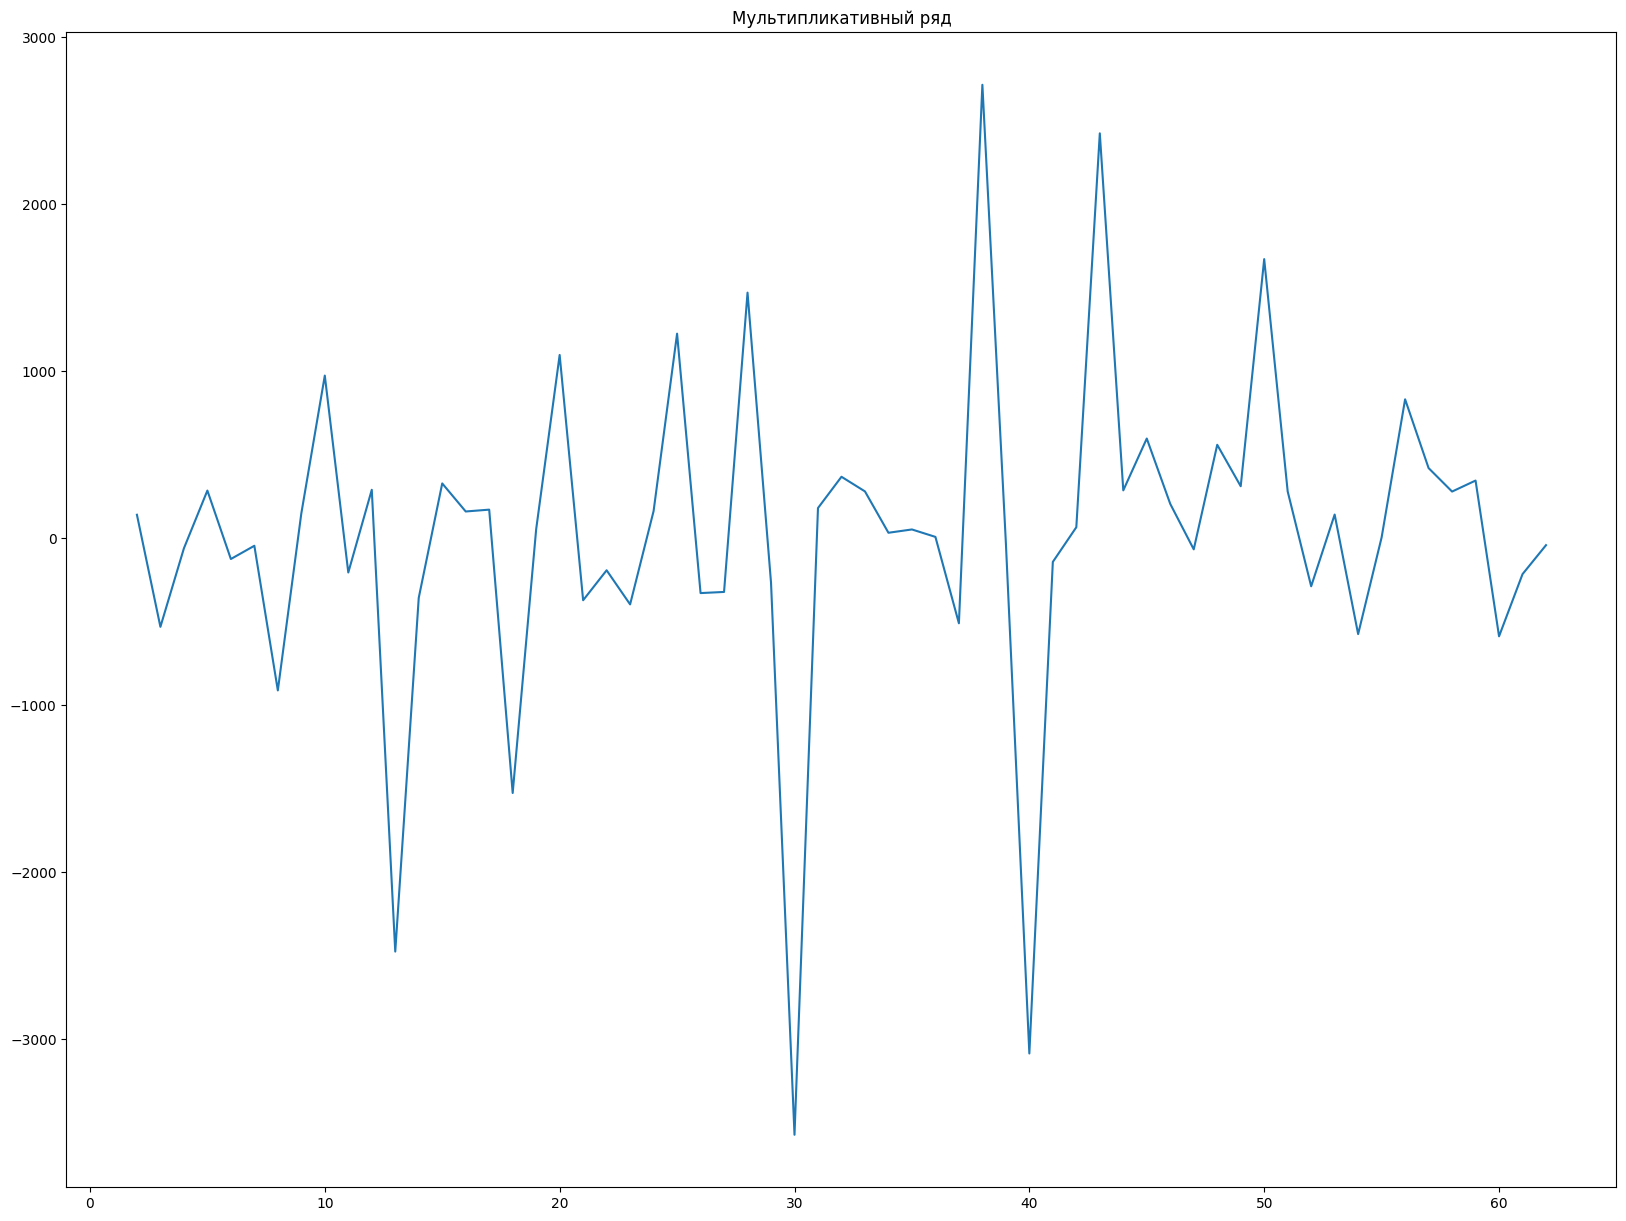

In [42]:
add_row = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))

plt.plot(add_row)
plt.title("Мультипликативный ряд")
plt.show()

<Axes: >

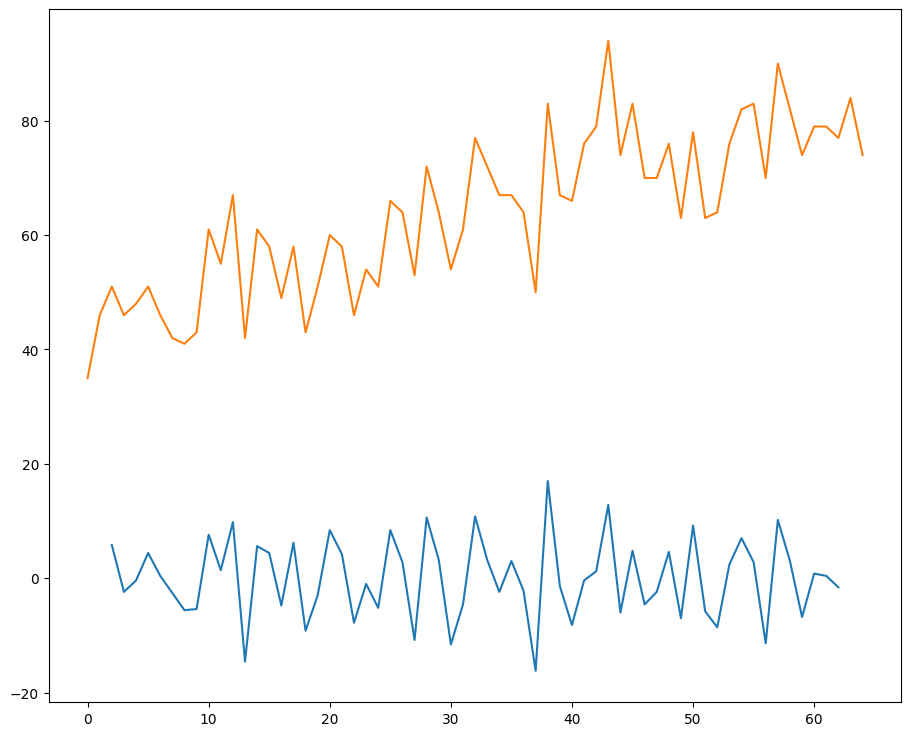

In [43]:
sales = sale["x"] - decompose.trend
sales.plot()
sale["x"].plot()



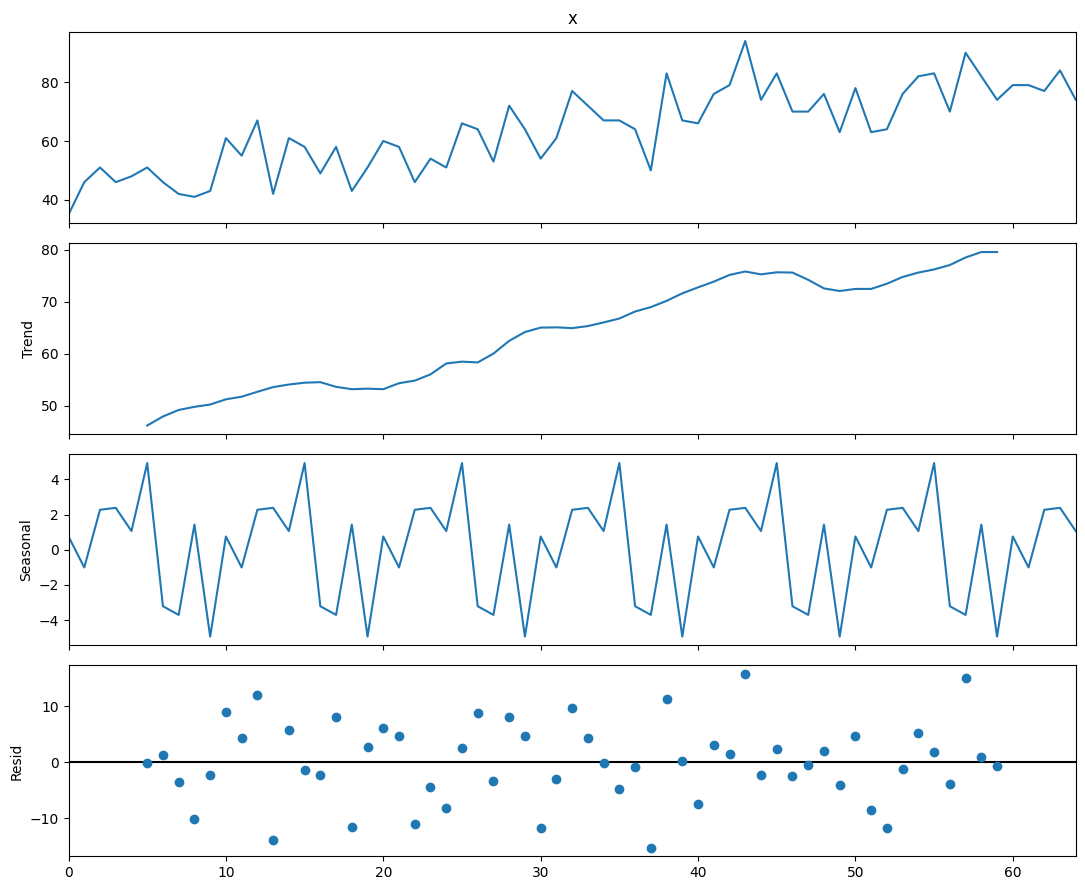

In [44]:
decompose = seasonal_decompose(sale["x"], period=10, model="additive")
decompose.plot()
plt.show()


In [48]:
# Тест Дики-Фулера
alpha = 0.05
name = "Продажи"
ts = sale["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Продажи :
Test Statistic                 -1.587648
p-value                         0.489795
#Lags Used                      2.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


<ipython-input-49-fd25c590d08a>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


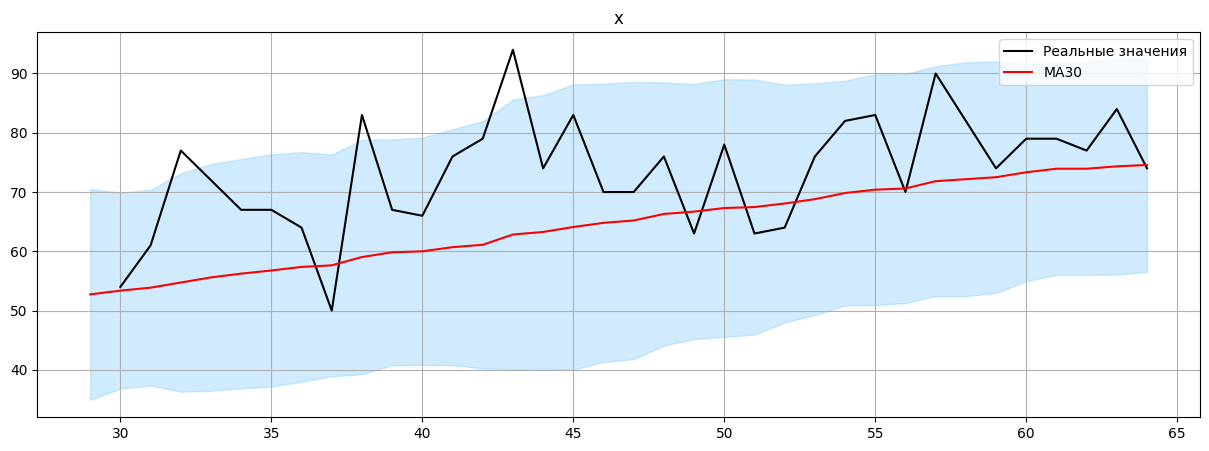

In [49]:
window = 30
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()
plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")
plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")
lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)
plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')
plt.grid(True)
plt.show()

<Figure size 1200x700 with 0 Axes>

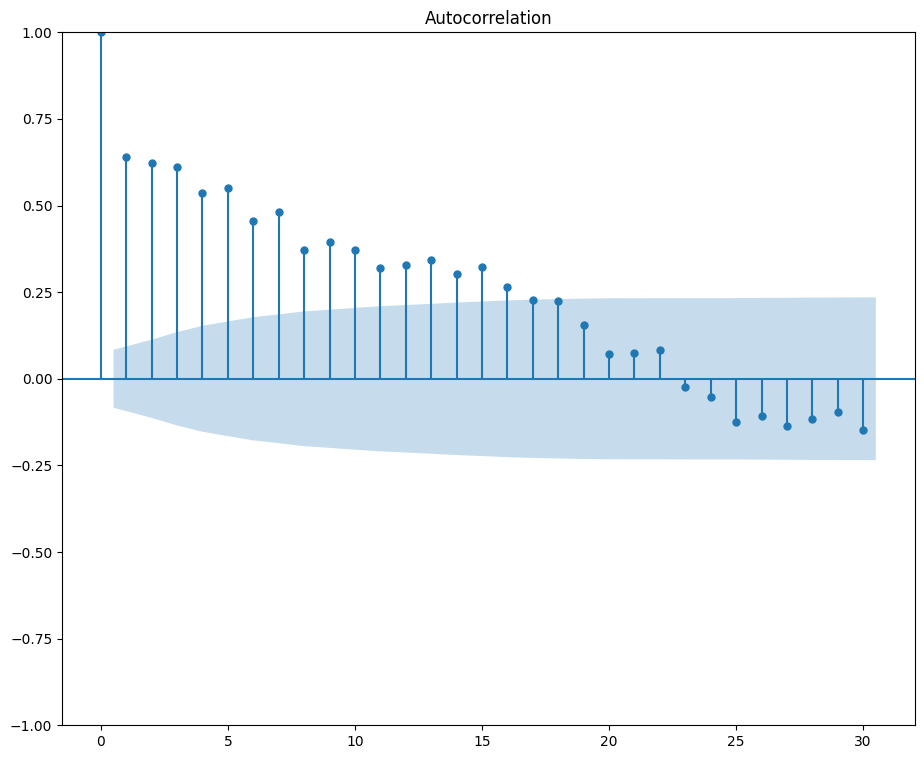

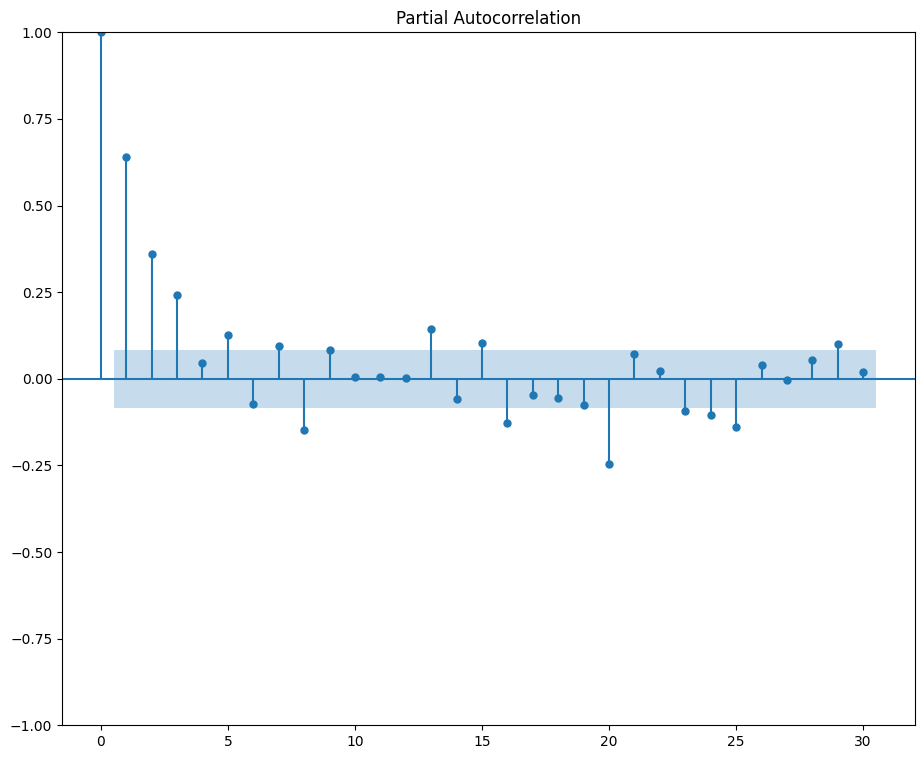

In [51]:
ts = sale["x"]


fig = plt.figure(figsize=(12, 7))
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)

pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

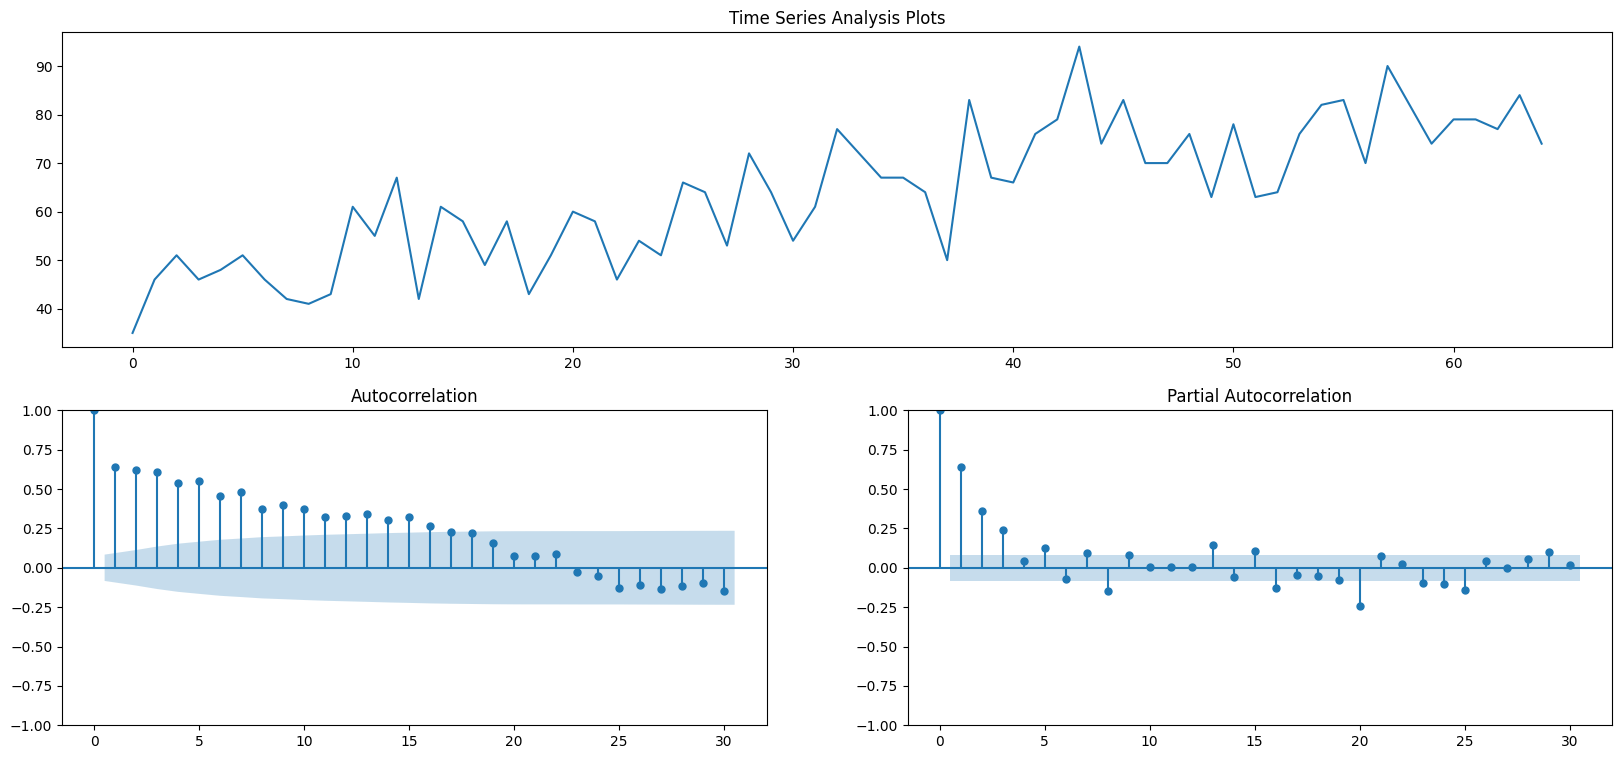

In [52]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None